# Midterm assigment
**Image enhancement** is the process of improving the visual quality of an image by adjusting its characteristics, such as contrast, brightness, or color balance. Image enhancement techniques can be used to emphasize certain features, correct for poor lighting conditions, or simply make an image more aesthetically pleasing.

In this assignment, students will implement different image enhancement techniques using Python and OpenCV to gain a deeper understanding of how these methods work and their applications in real-world scenarios.

The assignment can be structured as follows:

1. Load an image: The first step is to load an image into the code using a library such as OpenCV or Pillow. The image should have some room for improvement in terms of brightness, contrast, or color balance.

2. Histogram equalization: Apply histogram equalization to improve the contrast of the image. Use cv2.equalizeHist() for grayscale images or apply it to each color channel separately for color images. Plot the equalized image alongside the original image using a plotting library such as Matplotlib.

3. Contrast stretching: Implement a contrast stretching function that rescales the pixel intensities in the image to a desired range, such as [0, 255]. Apply the function to the image and plot the contrast-stretched image alongside the original and equalized images.

4. Adaptive histogram equalization: Apply adaptive histogram equalization using the Contrast Limited Adaptive Histogram Equalization (CLAHE) method in OpenCV (cv2.createCLAHE()). Compare the results with global histogram equalization and plot the adaptively equalized image.

5. Color balance: Implement a color balance correction function that adjusts the color channels in the image to remove color casts (e.g., due to poor lighting conditions). One approach is to scale the intensities in each channel so that they have the same mean or median value. Apply the function to the image and plot the color-balanced image alongside the other enhanced images.

By completing this assignment, students can gain hands-on experience with various image enhancement techniques and learn how to apply these methods to improve the visual quality of digital images.

In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.8 MB 14.4 MB/s eta 0:00:03
   ------- -------------------------------- 6.8/38.8 MB 21.0 MB/s eta 0:00:02
   ----------- ---------------------------- 11.5/38.8 MB 21.2 MB/s eta 0:00:02
   ----------------- ---------------------- 16.5/38.8 MB 21.7 MB/s eta 0:00:02
   ---------------------- ----------------- 22.0/38.8 MB 22.5 MB/s eta 0:00:01
   ---------------------------- ----------- 27.8/38.8 MB 23.5 MB/s eta 0:00:01
   ---------------------------------- ----- 33.3/38.8 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------  38.8/38.8 MB 24.2 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 22.9 MB/s eta 0:00:00


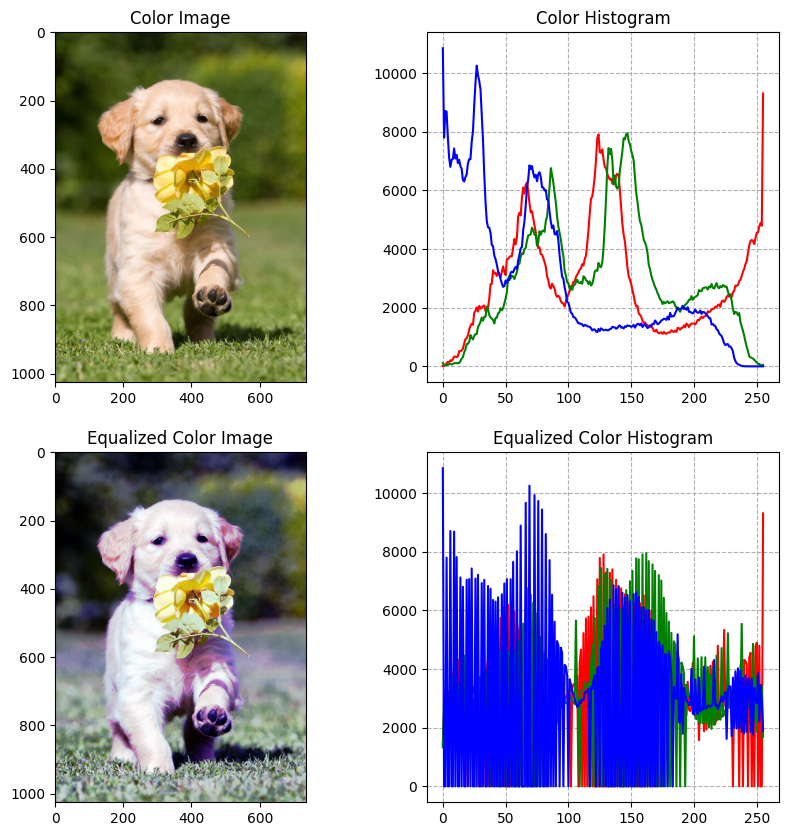

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
color_img = cv2.imread('./image/dog.jpg')

# Split the image into its color channels
b, g, r = cv2.split(color_img)

# Compute the histograms for each color channel
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Apply histogram equalization to each channel
eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

# Merge the equalized channels back into a color image
equalized_color_img = cv2.merge((eq_b, eq_g, eq_r))

# Compute the histograms for each channel of the equalized image
equalized_hist_r = cv2.calcHist([eq_r], [0], None, [256], [0, 256])
equalized_hist_g = cv2.calcHist([eq_g], [0], None, [256], [0, 256])
equalized_hist_b = cv2.calcHist([eq_b], [0], None, [256], [0, 256])

# Plot the original color image, its histogram, the equalized color image, and its histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0, 0].imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Color Image')

axes[0, 1].plot(hist_r, color='r')
axes[0, 1].plot(hist_g, color='g')
axes[0, 1].plot(hist_b, color='b')
axes[0, 1].set_title('Color Histogram')
axes[0, 1].set_axisbelow(True)
axes[0, 1].grid(True, linestyle='--', zorder=0)
axes[1, 0].imshow(cv2.cvtColor(equalized_color_img, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Equalized Color Image')

axes[1, 1].plot(equalized_hist_r, color='r')
axes[1, 1].plot(equalized_hist_g, color='g')
axes[1, 1].plot(equalized_hist_b, color='b')
axes[1, 1].set_title('Equalized Color Histogram')
axes[1, 1].grid(True, linestyle='--', zorder=0)
axes[1, 1].set_axisbelow(True)

plt.show()

In [ ]:
### TODO 1 : Write a essay in English or Vietnamese to evaluate the above result.
'''
    Sau khi dùng cân bằng histogram, dựa trên quan sát và biểu đồ histogram, hình ảnh được cân bằng histogram có một số đặc điểm sau:
    - Hình ảnh có sự tương phản tốt hơn ở một số chi tiết phân biệt vùng sáng và vùng tối. Do tần suất pixel có giá trị pixel tiến về 0 xuất hiện nhiều hơn, 
    và có sự phân vùng tần suất xuất hiện các pixel theo giá trị pixel ( 0 - 100, 100 - 200, 200 - 255).
    - Có sự thay đổi trong màu sắc của hình ảnh. Do tần suất xuất hiện và giá trị pixel của pixel có màu xanh dương chiếm nhiều hơn so với pixel có màu đỏ và xanh lá.
    - Tần suất pixel có giá trị pixel 0 xuất hiện nhiều nhất là pixel có màu xanh. Với giá trị pixel 255 thì tần suất pixel có màu đỏ xuất hiện nhiều nhất. 
'''

### 2. Contrast stretching

#### 2.1. Color images

In [1]:
def contrast_stretching_color_image(img, a, b, c, d):
    """
    Rescales the pixel intensities in a color image to a desired range using contrast stretching.

    Parameters
    ----------
    img : numpy.ndarray
        The input color image to apply contrast stretching on.
    a : int
        The lower limit of the pixel intensity range that will be stretched.
    b : int
        The upper limit of the pixel intensity range that will be stretched.
    c : int
        The lower limit of the output pixel intensity range.
    d : int
        The upper limit of the output pixel intensity range.

    Returns
    -------
    numpy.ndarray
        The contrast-stretched color image with pixel intensities rescaled to the range [c, d].
    """

    # Initialize the output image with zeros of the same shape as the input image
    stretched_img = np.zeros_like(img)

    # Loop over each color channel in the image
    for channel in range(img.shape[2]):
        pixel_vals = img[:, :, channel]
        # Calculate the new pixel intensities using linear transformation and set them to the output image
        stretched_vals = np.where(pixel_vals < a, c, np.where(pixel_vals > b, d, ((pixel_vals - a) * ((d - c) / (b - a))) + c))
        stretched_img[:, :, channel] = stretched_vals

    return stretched_img

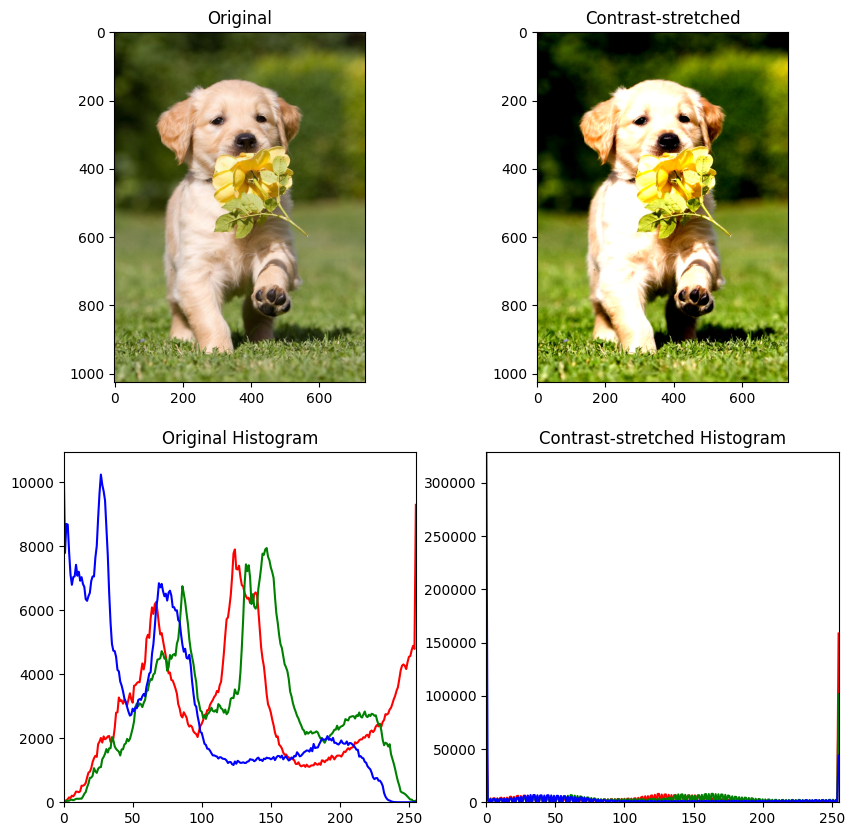

In [14]:
# Load a color image
img = cv2.imread('./image/dog.jpg', cv2.IMREAD_COLOR)

# Convert the image to RGB for displaying with Matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Calculate the histograms of the original and contrast-stretched images
orig_hist_r, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 255))
orig_hist_g, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 255))
orig_hist_b, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 255))

stretched_img = contrast_stretching_color_image(img, 50, 200, 0, 255)
stretched_hist_r, _ = np.histogram(stretched_img[:, :, 0], bins=256, range=(0, 255))
stretched_hist_g, _ = np.histogram(stretched_img[:, :, 1], bins=256, range=(0, 255))
stretched_hist_b, _ = np.histogram(stretched_img[:, :, 2], bins=256, range=(0, 255))

# Plot the images and histograms
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].imshow(img)
axs[0, 0].set_title('Original')

axs[0, 1].imshow(stretched_img)
axs[0, 1].set_title('Contrast-stretched')

axs[1, 0].plot(orig_hist_r, color='red')
axs[1, 0].plot(orig_hist_g, color='green')
axs[1, 0].plot(orig_hist_b, color='blue')
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_ylim([0, max(max(orig_hist_r), max(orig_hist_g), max(orig_hist_b)) + 100])
axs[1, 0].set_title('Original Histogram')

axs[1, 1].plot(stretched_hist_r, color='red')
axs[1, 1].plot(stretched_hist_g, color='green')
axs[1, 1].plot(stretched_hist_b, color='blue')
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_ylim([0, max(max(stretched_hist_r), max(stretched_hist_g), max(stretched_hist_b)) + 100])
axs[1, 1].set_title('Contrast-stretched Histogram')

plt.show()

In [ ]:
### TODO 2: Write a essay in English or Vietnamese to evaluate the above result.
'''
    Sau khi tăng độ tương phản của ảnh gốc, dựa trên hình ảnh và biểu đồ histogram thì hình ảnh được làm tăng độ tương phản có những đặc điểm sau:
    - Hình ảnh có sự tương phản tốt hơn. Dựa trên biểu đồ histogram, số lượng Pixel có giá trị pixel 0 và số lượng pixel có giá trị pixel 255 tăng lên rất nhiều so với số lượng pixel có giá trị pixel khác.
    - Hình ảnh có sự nổi bật tại những vị trí có sự phân biệt rõ rệt giữa vùng sáng và tối. Một số chi tiết sẽ bị mất đi do vùng sáng trở nên sáng quá mức và vùng tối trở nên tối quá mức.
    - Dựa trên biểu đồ histogram, Các giá trị pixel khác giá trị pixel 0 và 255 có số tần suất pixel đồng đều nhau. Hầu hết tần suất xuất hiện pixel tại các giá trị pixel khác 0 và 255 ít hơn rất nhiều.
    - Màu sắc của hình ảnh trở nên tươi hơn. Dựa trên biểu đồ histogram, tần suất các pixel có màu xanh/đỏ và có giá trị pixel từ 100 - 200 nhỉnh hơn so với các giá trị pixel khác 0 và 255.
'''

#### 2.2. Gray-scale images

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching_gray_image(img, a, b, c, d):
    """
    Rescales the pixel intensities in an image to a desired range using contrast stretching.

    Parameters
    ----------
    img : numpy.ndarray
        The input image to apply contrast stretching on.
    a : int
        The lower limit of the pixel intensity range that will be stretched.
    b : int
        The upper limit of the pixel intensity range that will be stretched.
    c : int
        The lower limit of the output pixel intensity range.
    d : int
        The upper limit of the output pixel intensity range.

    Returns
    -------
    numpy.ndarray
        The contrast-stretched image with pixel intensities rescaled to the range [c, d].
    """

    # Initialize the output image with zeros of the same shape as the input image
    stretched_img = np.zeros_like(img)

    # Loop over each pixel in the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = img[i, j]
            # If the pixel value is less than the lower limit of the pixel intensity range, set it to the lower limit of the output pixel intensity range
            if pixel_val < a:
                new_val = c
            # If the pixel value is greater than the upper limit of the pixel intensity range, set it to the upper limit of the output pixel intensity range
            elif pixel_val > b:
                new_val = d
            # Otherwise, calculate the new pixel intensity using linear transformation and set it to the output image
            else:
                new_val = ((pixel_val - a) * ((d - c) / (b - a))) + c
            stretched_img[i, j] = new_val

    return stretched_img

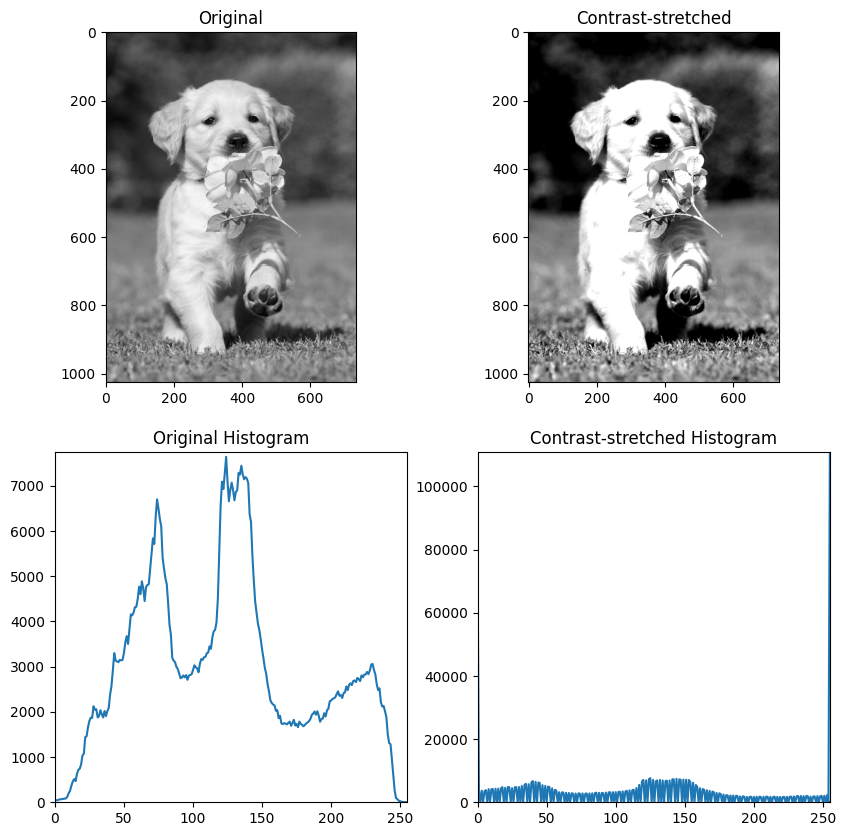

In [16]:
# Load an image
img = cv2.imread('./image/dog.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the histograms of the original and contrast-stretched images
orig_hist, _ = np.histogram(img, bins=256, range=(0, 255))
stretched_hist, _ = np.histogram(contrast_stretching_gray_image(img, 50, 200, 0, 255), bins=256, range=(0, 255))

# Plot the images and histograms
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 1].imshow(contrast_stretching_gray_image(img, 50, 200, 0, 255), cmap='gray')
axs[0, 1].set_title('Contrast-stretched')

axs[1, 0].plot(orig_hist)
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_ylim([0, max(orig_hist) + 100])
axs[1, 0].set_title('Original Histogram')

axs[1, 1].plot(stretched_hist)
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_ylim([0, max(stretched_hist) + 100])
axs[1, 1].set_title('Contrast-stretched Histogram')

plt.show()

In [ ]:
### TODO 3: Write a essay in English or Vietnamese to evaluate the above result.
'''
    Dựa trên biểu đồ histogram, hình ảnh của ảnh xám và ảnh xám được căng độ tương phản thì hình ảnh sau khi được căng độ tương phản có một số đặc điểm sau:
    - Hình ảnh có sự tương phản tốt hơn. Dựa trên biểu đồ histogram, tần suất của pixel có giá trị pixel 0 và 255 nhiều hơn so với các giá trị pixel khác.
    - Các chi tiết phân biệt vùng sáng và vùng tối được nổi bật hơn.
    - Các vùng có độ sáng cao thì trở nên sáng hơn rất nhiều, và một số chi tiết ở trong vùng này bị làm mờ đi hoặc mất đi sau khi làm căng độ tương phản.
'''

### 3. Adaptive histogram equalization

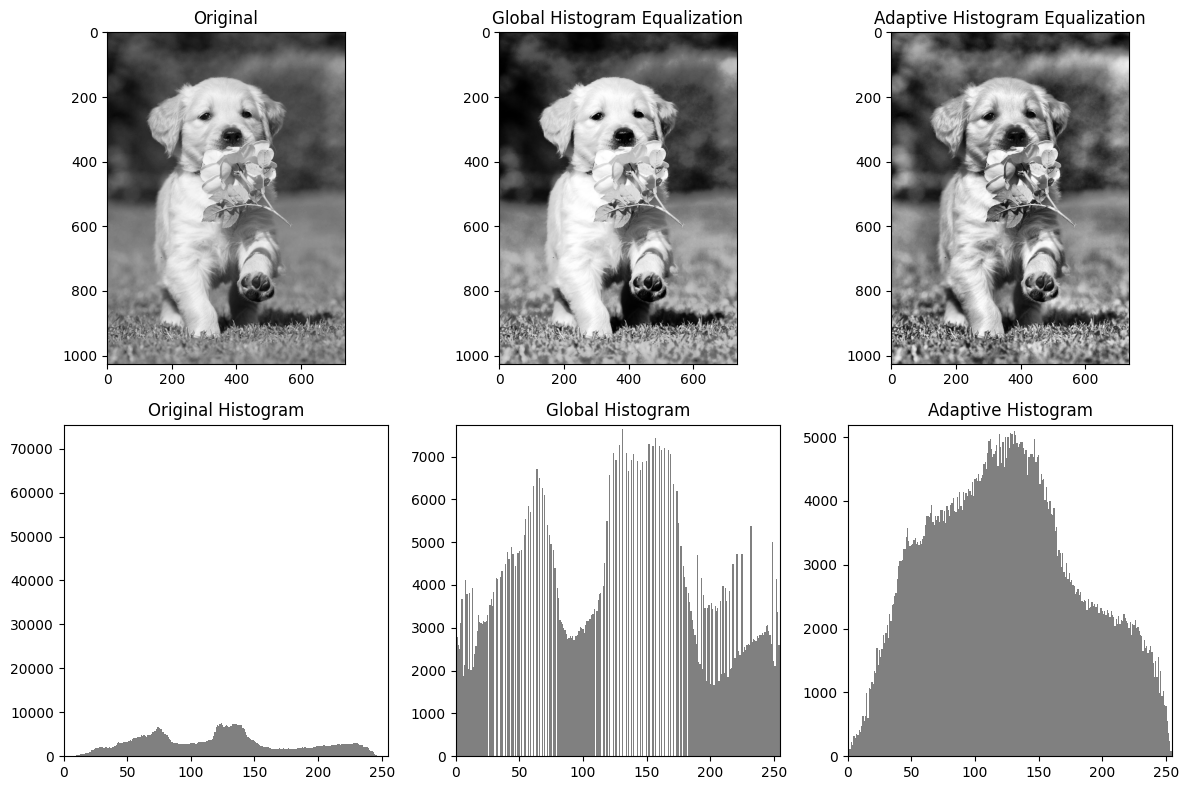

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in grayscale
img = cv2.imread('./image/dog.jpg', cv2.IMREAD_GRAYSCALE)

# Apply global histogram equalization
global_hist_eq = cv2.equalizeHist(img)
global_hist, _ = np.histogram(global_hist_eq, bins=256, range=(0, 255))

# Apply adaptive histogram equalization using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
adaptive_hist_eq = clahe.apply(img)
adaptive_hist, _ = np.histogram(adaptive_hist_eq, bins=256, range=(0, 255))

# Plot the original, global histogram equalized, and adaptively equalized images and histograms
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(global_hist_eq, cmap='gray')
axs[0, 1].set_title('Global Histogram Equalization')

axs[0, 2].imshow(adaptive_hist_eq, cmap='gray')
axs[0, 2].set_title('Adaptive Histogram Equalization')

axs[1, 0].hist(img.flatten(), bins=256, range=(0, 255), color='gray')
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_ylim([0, img.size/10])
axs[1, 0].set_title('Original Histogram')

axs[1, 1].bar(np.arange(256), global_hist, color='gray', width=1)
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_ylim([0, global_hist.max()+100])
axs[1, 1].set_title('Global Histogram')

axs[1, 2].bar(np.arange(256), adaptive_hist, color='gray', width=1)
axs[1, 2].set_xlim([0, 255])
axs[1, 2].set_ylim([0, adaptive_hist.max()+100])
axs[1, 2].set_title('Adaptive Histogram')

plt.tight_layout()
plt.show()

In [ ]:
### TODO 4: Write a essay in English or Vietnamese to evaluate the above result.
'''
    Với cân bằng lược đồ xám toàn cục, hình ảnh có một số đặc trưng sau:
    - Về mặt tổng thể thì bố cục hình ảnh vẫn giống so với ảnh gốc nhưng một số chi tiết của hình ảnh được nổi bật, một số chi tiết bị mờ đi nhưng không biến mất.
    - Dựa vào biểu đồ histogram thì ta thấy có sự thưa thớt ở sự xuất hiện các giá trị pixel ở khoảng giá trị pixel là (25 - 80) và (120 - 180), cùng với tần suất xuất hiện pixel trong khoảng này cao hơn rất nhiều so với các khoảng khác. 
    Điều đó cho thấy có sự cân bằng sự tương phản ở một số vùng và các chi tiết của hình ảnh tuy bị mờ đi do sự thưa thớt của các giá trị pixel nhưng vẫn không mất đi những chi tiết vốn có.
    - Về độ sáng, hình ảnh có sự phân bố về độ sáng đồng đều hơn.
    
    Với cân bằng lược đồ xám hiển vi, hình ảnh có một số đặc trưng sau:
    - Về mặt tổng thể, bố cục hình ảnh vẫn giống so với ảnh gốc, một số chi tiết được làm rõ và nổi bật hơn, ít bị nhòe so với cân bằng lược đồ xám toàn cục.
    - Về độ sáng, hình ảnh có sự cân bằng về độ sáng ở các vùng nhỏ. Một số chi tiết thể hiện nét của hình ảnh thì sẽ có độ tối cao hơn.
    - Về độ tương phản, hình ảnh vẫn giữ được độ tương phản giữa các vùng.
    - Một số chi tiết của hình ảnh dược nổi bật lên và những chi tiết vốn có thì được làm rõ thêm. Điều đó làm cho hình ảnh có chiều sâu rõ rệt.
'''

### 4. Conclusion

In [ ]:
### TODO 5: Write a essay in English or Vietnamese to conclude about the above tasks
'''
Sau khi áp dụng các biện pháp tăng cường hình ảnh, hình ảnh có sự cải thiện về mặt chất lượng. Hình ảnh được cân bằng về độ sáng và vẫn giữ được những chi tiết vốn có. Tuy nhiên, với cân bằng histogram thì hình ảnh sẽ mất đi màu sắc 
tự nhiên vốn có, một số chi tiết bị làm mờ. Với hình ảnh được tăng độ tương phản thì màu sắc của hình ảnh trở nên sống động hơn nhưng lại mất đi những chi tiết nhỏ do quá trình làm tăng độ tương phản. Với hình ảnh xám sau khi dùng cân bằng
lược đồ xám toàn cục thì hình ảnh trở nên nét hơn, các chi tiết được làm rõ và nhiều chi tiết mới được nổi bật, hình ảnh được cân bằng về độ sáng ở các vùng nhỏ. Chiều sâu của hình ảnh được tăng lên, hình ảnh không bị biến dạng quá mức.
Tóm lại, với mỗi hình ảnh thì kết quả cho ra sẽ khác nhau, nhưng nhìn chung hình ảnh có sự cải thiện về độ nét.
'''